### Feature selection with mutual information score

In [118]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [119]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
s = df.isna().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

separate X and Y values

In [123]:
X =df.drop(columns=['PassengerId','Name','Ticket','Survived'])
Y =df[['Survived']]

In [124]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [125]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


Separate cat and con features

In [126]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [127]:
cat

['Sex', 'Cabin', 'Embarked']

In [128]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Create a simple sklearn pipeline for feature selection


1.ordinal encoder = categorical features

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [130]:
#numerical pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

#categorical Pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                           ('ord_enc',OrdinalEncoder())])

#combine both pipeline
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [131]:
X_pre = pre.fit_transform(X)
X_pre

array([[  0.82737724,  -0.5924806 ,   0.43279337, ...,   1.        ,
        147.        ,   2.        ],
       [ -1.56610693,   0.63878901,   0.43279337, ...,   0.        ,
         81.        ,   0.        ],
       [  0.82737724,  -0.2846632 ,  -0.4745452 , ...,   0.        ,
        147.        ,   2.        ],
       ...,
       [  0.82737724,   0.        ,   0.43279337, ...,   0.        ,
        147.        ,   2.        ],
       [ -1.56610693,  -0.2846632 ,  -0.4745452 , ...,   1.        ,
         60.        ,   0.        ],
       [  0.82737724,   0.17706291,  -0.4745452 , ...,   1.        ,
        147.        ,   1.        ]])

In [132]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex', 'cat__Cabin', 'cat__Embarked'], dtype=object)

In [133]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex,cat__Cabin,cat__Embarked
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,1.0,147.0,2.0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,0.0,81.0,0.0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,0.0,147.0,2.0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,0.0,55.0,2.0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,1.0,147.0,2.0
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,1.0,147.0,2.0
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,0.0,30.0,2.0
888,0.827377,0.000000,0.432793,2.008933,-0.176263,0.0,147.0,2.0
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,1.0,60.0,0.0


### Calculating mmutual information score

In [134]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre,Y)

In [135]:
mi = pd.Series(mi)
mi.index=cols
mi = mi.sort_values(ascending=False)
mi

cat__Sex         0.147217
num__Fare        0.139463
cat__Cabin       0.065571
num__Pclass      0.055575
num__SibSp       0.037807
cat__Embarked    0.025211
num__Age         0.018211
num__Parch       0.005227
dtype: float64

<Axes: title={'center': 'Mutual Imformation Scores'}>

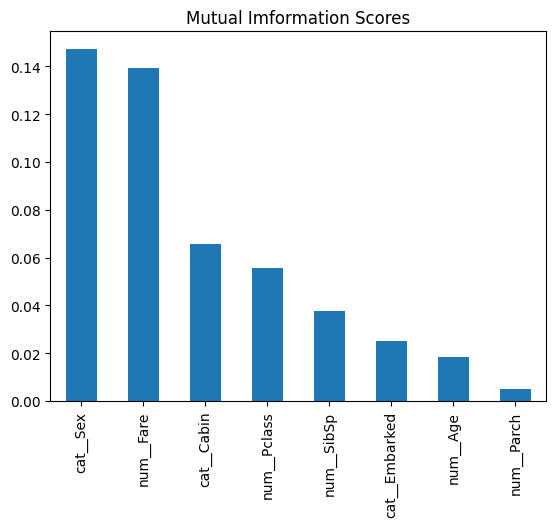

In [136]:
mi.plot(kind='bar',title='Mutual Imformation Scores')

In [137]:
sel_cols = list(mi[0:6].index)
sel_cols

['cat__Sex',
 'num__Fare',
 'cat__Cabin',
 'num__Pclass',
 'num__SibSp',
 'cat__Embarked']

In [138]:
# Approach 2 Select top n features
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(mutual_info_classif,k=6)
sel_features = sel.fit_transform(X_pre, Y)


In [139]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Pclass', 'num__SibSp', 'num__Fare', 'cat__Sex', 'cat__Cabin',
       'cat__Embarked'], dtype=object)

In [140]:
sel_cols[0].split('__')[1]


'Pclass'

In [141]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)


In [142]:
imp_cols

['Pclass', 'SibSp', 'Fare', 'Sex', 'Cabin', 'Embarked']

In [143]:
X_sel = X[imp_cols]

In [144]:
X_sel

,Pclass,SibSp,Fare,Sex,Cabin,Embarked
0,3,1,7.2500,male,NaN,S
1,1,1,71.2833,female,C85,C
2,3,0,7.9250,female,NaN,S
3,1,1,53.1000,female,C123,S
4,3,0,8.0500,male,NaN,S
...,...,...,...,...,...,...
886,2,0,13.0000,male,NaN,S
887,1,0,30.0000,female,B42,S
888,3,1,23.4500,female,NaN,S
889,1,0,30.0000,male,C148,C


cat con separation

In [145]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel= list(X_sel.columns[X_sel.dtypes!='object'])

In [146]:
cat_sel

['Sex', 'Cabin', 'Embarked']

In [147]:
con_sel

['Pclass', 'SibSp', 'Fare']

### Create a final model

In [148]:
from sklearn.preprocessing import OneHotEncoder

In [149]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num',num_pipe2, con_sel),
                          ('cat',cat_pipe2, cat_sel)])

In [150]:
X_sel_pre = pre2.fit_transform(X_sel).toarray()
X_sel_pre

array([[ 0.82737724,  0.43279337, -0.50244517, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693,  0.43279337,  0.78684529, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.48885426, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724,  0.43279337, -0.17626324, ...,  0.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.4745452 , -0.04438104, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.49237783, ...,  1.        ,
         0.        ,  0.        ]])

In [151]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Pclass', 'num__SibSp', 'num__Fare', 'cat__Sex_female',
       'cat__Sex_male', 'cat__Cabin_A10', 'cat__Cabin_A14',
       'cat__Cabin_A16', 'cat__Cabin_A19', 'cat__Cabin_A20',
       'cat__Cabin_A23', 'cat__Cabin_A24', 'cat__Cabin_A26',
       'cat__Cabin_A31', 'cat__Cabin_A32', 'cat__Cabin_A34',
       'cat__Cabin_A36', 'cat__Cabin_A5', 'cat__Cabin_A6',
       'cat__Cabin_A7', 'cat__Cabin_B101', 'cat__Cabin_B102',
       'cat__Cabin_B18', 'cat__Cabin_B19', 'cat__Cabin_B20',
       'cat__Cabin_B22', 'cat__Cabin_B28', 'cat__Cabin_B3',
       'cat__Cabin_B30', 'cat__Cabin_B35', 'cat__Cabin_B37',
       'cat__Cabin_B38', 'cat__Cabin_B39', 'cat__Cabin_B4',
       'cat__Cabin_B41', 'cat__Cabin_B42', 'cat__Cabin_B49',
       'cat__Cabin_B5', 'cat__Cabin_B50', 'cat__Cabin_B51 B53 B55',
       'cat__Cabin_B57 B59 B63 B66', 'cat__Cabin_B58 B60',
       'cat__Cabin_B69', 'cat__Cabin_B71', 'cat__Cabin_B73',
       'cat__Cabin_B77', 'cat__Cabin_B78', 'cat__Cabin_B79',
       'cat__Cab

In [152]:
X_sel_pre = pd.DataFrame(X_sel_pre,columns=final_cols)
X_sel_pre

,num__Pclass,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,0.827377,0.432793,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.566107,0.432793,0.786845,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.827377,-0.474545,-0.488854,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.566107,0.432793,0.420730,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.827377,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.474545,-0.386671,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,-1.566107,-0.474545,-0.044381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0.827377,0.432793,-0.176263,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,-1.566107,-0.474545,-0.044381,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Train Test Split

In [153]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y,test_size=0.2,random_state=42)

Create a final model on Gradient boost classifier

In [154]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=21)
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=21)

In [155]:
# Check accuracy in training
gbc.score(xtrain, ytrain)

0.8904494382022472

In [156]:
# Check accuracy in testing
gbc.score(xtest, ytest)

0.7988826815642458

### perform hyperparameter tunning
1.Gridsearchcv(slower)

2.RandomisedSearchCv(faster)

In [157]:
params = {'learning_rate' : [0.01,0.05,0.1,0.2],
          'max_depth': [2,3,4,5,6,7,8],
          'min_samples_split': [6,7,8,9,10]}

In [158]:
from sklearn.model_selection import RandomizedSearchCV
base_gbc = GradientBoostingClassifier(random_state=21)
rscv = RandomizedSearchCV(base_gbc, param_distributions=params, cv=5, scoring='f1',random_state=21)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=21),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [6, 7, 8, 9, 10]},
                   random_state=21, scoring='f1')

In [159]:
rscv.best_params_

{'min_samples_split': 8, 'max_depth': 7, 'learning_rate': 0.1}

In [160]:
rscv.best_score_

0.7326937899833008

In [161]:
best_gbc = rscv.best_estimator_

Evaluate the model

In [162]:
best_gbc.score(xtrain,ytrain)

0.922752808988764

In [163]:
best_gbc.score(xtest,ytest)

0.8044692737430168

predict train and test data

In [164]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts= best_gbc.predict(xtest)

In [165]:
ypred_tr[0:5]


array([0, 0, 0, 0, 0], dtype=int64)

In [166]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


Confusion matrix

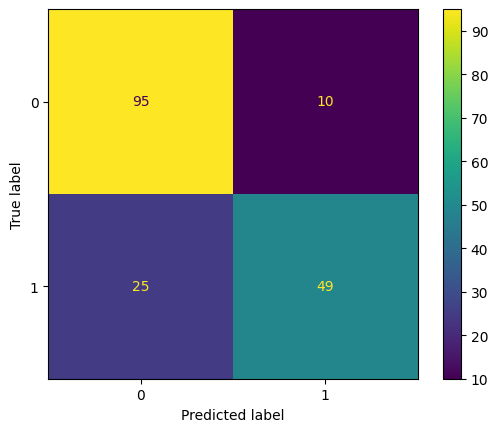

In [167]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_gbc.classes_)
cfd.plot()

Classification Report

In [168]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



Selected the model for final predictions

perform predictions on test_titanic.csv

In [169]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [170]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [171]:
xnew.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [172]:
xnew_pre = pre2.transform(xnew).toarray()
xnew_pre

array([[ 0.82737724, -0.4745452 , -0.49078316, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.43279337, -0.50747884, ...,  0.        ,
         1.        ,  0.        ],
       [-0.36936484, -0.4745452 , -0.45336687, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82737724, -0.4745452 , -0.50244517, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.4745452 , -0.48633742, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724,  0.43279337, -0.19824428, ...,  0.        ,
         0.        ,  0.        ]])

In [173]:
xnew_pre = pd.DataFrame(xnew_pre,columns=final_cols)
xnew_pre

,num__Pclass,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unknown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unknown
0,0.827377,-0.474545,-0.490783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.827377,0.432793,-0.507479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.369365,-0.474545,-0.453367,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.827377,-0.474545,-0.474005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.827377,0.432793,-0.401017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.827377,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
414,-1.566107,-0.474545,1.544246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
415,0.827377,-0.474545,-0.502445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
416,0.827377,-0.474545,-0.486337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


perform predictions

In [174]:
pred = best_gbc.predict(xnew_pre)
pred[0:5]


array([0, 1, 0, 0, 1], dtype=int64)

In [179]:
proba = best_gbc.predict_proba(xnew_pre)[:,1]
proba

array([0.12175783, 0.83448343, 0.1081008 , 0.1081008 , 0.65746409,
       0.1081008 , 0.25853368, 0.11681396, 0.93903272, 0.11355828,
       0.06019298, 0.12638525, 0.98088745, 0.12117842, 0.97896804,
       0.97732577, 0.11463362, 0.16001749, 0.27144511, 0.93903272,
       0.08783543, 0.05145227, 0.97437193, 0.08563638, 0.98016994,
       0.17510776, 0.9813259 , 0.16001749, 0.23933606, 0.14157089,
       0.12117842, 0.20726031, 0.80840349, 0.04800634, 0.3494508 ,
       0.17363731, 0.18039168, 0.18870589, 0.1081008 , 0.53284408,
       0.4859199 , 0.21168174, 0.13545689, 0.92531909, 0.97656926,
       0.26105368, 0.34963226, 0.11084912, 0.98205819, 0.77403093,
       0.14644691, 0.11883886, 0.97542452, 0.98454797, 0.21244588,
       0.10425323, 0.06019298, 0.07083925, 0.18254507, 0.98002289,
       0.06019298, 0.10189279, 0.10495163, 0.81637489, 0.17097475,
       0.24594557, 0.83875187, 0.06188767, 0.34963226, 0.98142699,
       0.66301088, 0.06019298, 0.59465159, 0.34963226, 0.98002

Save this in DataFrame

In [180]:
df_results = xnew[['PassengerId']]
df_results

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [181]:
df_results['Survived']=pred
df_results['Probability']=proba

In [182]:
df_results

,PassengerId,Survived,Probability
0,892,0,0.121758
1,893,1,0.834483
2,894,0,0.108101
3,895,0,0.108101
4,896,1,0.657464
...,...,...,...
413,1305,0,0.095906
414,1306,1,0.977744
415,1307,0,0.068115
416,1308,0,0.095906


In [183]:
df_results['Survived'].value_counts()

Survived
0    287
1    131
Name: count, dtype: int64

<Axes: xlabel='Survived'>

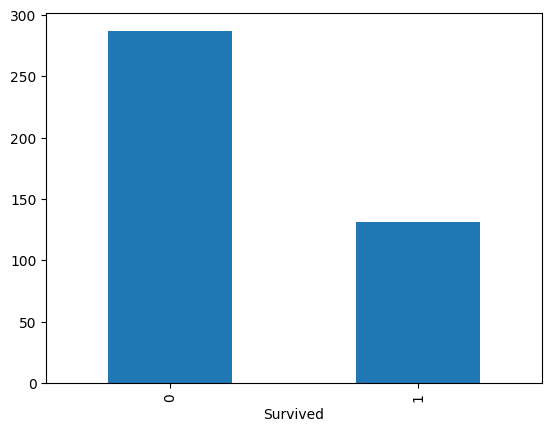

In [184]:
df_results['Survived'].value_counts().plot(kind='bar')

In [185]:
df_results.to_csv('Result.csv',index=False)